In [1]:
import numpy as np
import igraph as ig
from scipy.sparse import csgraph as cs

In [2]:
initial_tree = np.array([
    [0, 1, 1, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
])
initial_tree

array([[0, 1, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [3]:
# create properties per GU index
gus = np.array([0, 1, 2, 3])
position = np.array(['apical', 'apical', 'lateral', 'apical'])
nb_fruits = np.array([0, 1, 2, 0])
nb_leaves = np.array([1, 2, 2, 1])

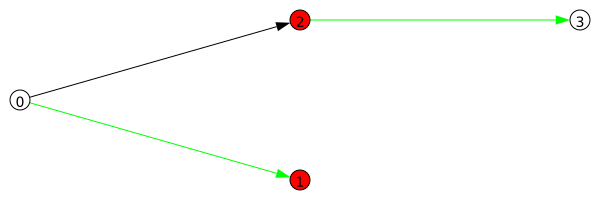

In [4]:
# plot tree and vertex properties
graph = ig.Graph.Adjacency(initial_tree.tolist())
layout = graph.layout_reingold_tilford()
layout.rotate(-90)
ig.plot(graph, layout=layout, bbox=(600, 200), **{
    'vertex_color': ['white' if f == 0 else 'red' for f in nb_fruits],
    'vertex_label': [i for i in gus],
    'edge_color': [ 'green' if position[c] == 'apical' else 'black' for p, c in graph.get_edgelist()]
})

In [5]:
# define flows from GU row index _> GU column index
gu_x_gu = np.array([
    [0, 0.5, 0.5, 0],
    [0, 1  , 0  , 0],
    [0, 0  , 1  , 0],
    [0, 0.25  , 0.75  , 0]
])

In [6]:
# extract edges
edges = np.argwhere(gu_x_gu)
edges

array([[0, 1],
       [0, 2],
       [1, 1],
       [2, 2],
       [3, 1],
       [3, 2]])

In [7]:
# flow coef. per edge
edges_flow = gu_x_gu[tuple(edges.transpose())]
edges_flow

array([0.5 , 0.5 , 1.  , 1.  , 0.25, 0.75])

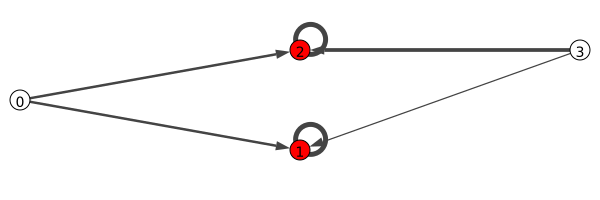

In [8]:
# display flows
graph_flow = ig.Graph.Adjacency((gu_x_gu > 0).tolist())
ig.plot(graph_flow, layout=layout, bbox=(600, 200), **{
    'vertex_color': ['white' if f == 0 else 'red' for f in nb_fruits],
    'vertex_label': [i for i in gus],
    'edge_width': [f*5 for f in edges_flow]

}, margin=(20,50,20,50))

In [9]:
# examples for computing aggregates based on flow coef.
gu_x_gu.transpose() * nb_leaves

array([[0.  , 0.  , 0.  , 0.  ],
       [0.5 , 2.  , 0.  , 0.25],
       [0.5 , 0.  , 2.  , 0.75],
       [0.  , 0.  , 0.  , 0.  ]])

In [10]:
np.sum(gu_x_gu.transpose()  * nb_leaves, 1)

array([0.  , 2.75, 3.25, 0.  ])

In [11]:
gu_x_gu.transpose() * nb_fruits

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 0.]])

In [12]:
np.sum(gu_x_gu.transpose() * nb_fruits, 1)

array([0., 1., 2., 0.])

In [13]:
# leaf-fruit ratio
np.sum(gu_x_gu.transpose() * nb_leaves, 1) / np.sum(gu_x_gu.transpose() * nb_fruits, 1)

<ipython-input-13-7a78f33228cf>:2: RuntimeWarning: invalid value encountered in true_divide
  np.sum(gu_x_gu.transpose() * nb_leaves, 1) / np.sum(gu_x_gu.transpose() * nb_fruits, 1)


array([  nan, 2.75 , 1.625,   nan])

In [14]:
sparse_tree = cs.csgraph_from_dense(initial_tree)

In [15]:
distance = cs.shortest_path(sparse_tree, indices=np.argwhere(nb_fruits).flatten(), directed=False)
distance

array([[1., 0., 2., 3.],
       [1., 2., 0., 1.]])

In [16]:
flow = 1 - distance / distance.sum(0)
flow

array([[0.5 , 1.  , 0.  , 0.25],
       [0.5 , 0.  , 1.  , 0.75]])

In [17]:
t = np.zeros(initial_tree.shape)
t[:,(nb_fruits > 0)] = flow.transpose()
t

array([[0.  , 0.5 , 0.5 , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75, 0.  ]])

In [18]:
edges = np.argwhere(t)

In [43]:
edges_flow = gu_x_gu[tuple(edges.transpose())]
edges_flow

array([0.5 , 0.5 , 1.  , 1.  , 0.25, 0.75])

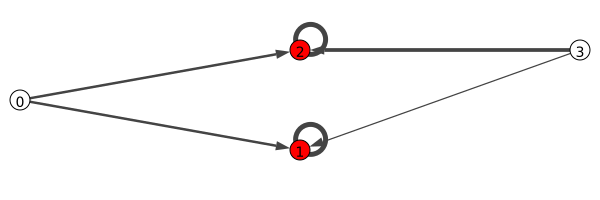

In [20]:
# display flows
graph_flow = ig.Graph.Adjacency((gu_x_gu > 0).tolist())
ig.plot(graph_flow, layout=layout, bbox=(600, 200), **{
    'vertex_color': ['white' if f == 0 else 'red' for f in nb_fruits],
    'vertex_label': [i for i in gus],
    'edge_width': [f*5 for f in edges_flow]

}, margin=(20,50,20,50))

In [21]:
graph2 = ig.Graph.Tree(10000, 2, mode=ig.TREE_OUT)

In [22]:
sparse = graph2.get_adjacency_sparse()
sparse

<10000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 9999 stored elements in Compressed Sparse Row format>

In [23]:
cs.shortest_path(sparse, indices=np.arange(10000-1000, 9999, dtype=np.int64))

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ...,  0., inf, inf],
       [inf, inf, inf, ..., inf,  0., inf]])

In [24]:
# find parent
initial_tree

array([[0, 1, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [25]:
# pick child 1 and 3 and select columns
initial_tree[:,[1,3]]

array([[1, 0],
       [0, 0],
       [0, 1],
       [0, 0]])

In [26]:
# get idx pairs of non-zero values
np.argwhere(initial_tree[:,[1,3]])

array([[0, 0],
       [2, 1]])

In [27]:
# pick the first colum of all rows - the index of the parent
(np.argwhere(initial_tree[:,[1,3]]))[:,0]

array([0, 2])

In [28]:
ancestor = np.array([
    [1, 1, 1, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
])

In [29]:
bursted = np.array([1,0,0,1])

In [30]:
np.argwhere(ancestor * bursted)[:,0]

array([0, 2])

In [31]:
np.bitwise_or.reduce(initial_tree)

array([0, 1, 1, 1])

In [32]:
np.argwhere(initial_tree)[:,0]

array([0, 0, 2])

In [33]:
initial_tree

array([[0, 1, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [34]:
initial_tree[0,0] = 10

In [40]:
t = np.argwhere(initial_tree * np.array([0,1,0,0]))
t

array([[0, 1]])

In [42]:
initial_tree[tuple(t.transpose())]

array([1])